In this step, the created dataset will be cleaned. Secondly a a train and test set will be generated.  Finally the sets numerical variables will be normalized using a standard deviation scaler.

# % of Missing Data

In [80]:
#Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing pathlib
import pathlib
pathlib.Path.cwd()
#display all columns
pd.pandas.set_option ("display.max_columns", None)


#reading csv
path = pathlib.Path.cwd() / 'sets' / 'mlb_dataset_treated2.csv'
df = pd.read_csv(path, index_col = None)
df




,Fecha,Local,Visit,Local pitcher,Visit pitcher,pitch,loc bull,vis bull,factor loc,factor loc 10,Direct local win?,Local Win?
0,20170419.0,Mariners,Marlins,F. Hernandez,E. Volquez,0.250000,-0.557143,-11.635294,0.2,-0.1,0.5,1.0
1,20170419.0,Blue,R.Sox,F. Liriano,R. Porcello,-0.133056,-1.915789,-15.161250,-0.2,-0.6,0.2,1.0
2,20170419.0,Mets,Phillies,R. Gsellman,V. Velasquez,0.273810,-0.666667,-9.663529,0.0,0.1,0.6,1.0
3,20170419.0,Rays,Tigers,C. Archer,J. Zimmermann,0.812500,-0.187500,-6.942857,0.4,-0.2,0.2,1.0
4,20170419.0,Braves,Nationals,J. Teheran,J. Ross,-0.076037,-0.430769,-5.453913,0.2,-0.1,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10594,20220717.0,Cubs,Mets,A. Sampson,D. Peterson,-0.958462,-1.000000,-9.750000,-0.8,-0.6,0.4,1.0
10595,20220717.0,Rangers,Mariners,G. Otto,C. Flexen,-0.704433,-4.521739,-9.360000,-0.8,-0.6,0.2,0.0
10596,20220717.0,Rockies,Pirates,A. Gomber,B. Wilson,0.029762,-0.842105,-5.555789,0.8,0.4,1.0,0.0
10597,20220717.0,Giants,Brewers,L. Webb,A. Ashby,0.361851,-0.254545,-6.573333,0.4,0.3,0.6,1.0


In [81]:
dataset = df.copy()
#Checking the % of NAN in file
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>1]

numerical_features_na = [features for features in features_with_na if dataset[features].dtypes != "O"]
categorical_features_na = [features for features in features_with_na if dataset[features].dtypes == "O"]


#Print missin values numerical val
print("Numerical Missing Features %")
for feature in numerical_features_na:
    print((feature,np.round(dataset[feature].isnull().mean(),4)*100), "% MISSING VALUES")
    
    
print("Categorical Missing Features %")
for feature in categorical_features_na:
    print((feature,np.round(dataset[feature].isnull().mean(),4)*100), "% MISSING VALUES")

Numerical Missing Features %
Categorical Missing Features %


Since there are not missing data, we will omit any cleaning operation

# Set Splitting

Distribution in whole set
0.0    0.464289
1.0    0.535711
Name: Local Win?, dtype: float64
Distribution in train set
0.0    0.464324
1.0    0.535676
Name: Local Win?, dtype: float64
Train set lenght 8479
Distribution in test set
0.0    0.464151
1.0    0.535849
Name: Local Win?, dtype: float64
Test set lenght 2120


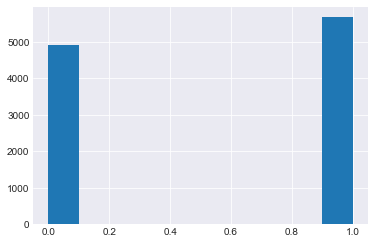

In [82]:
#The following code creates a train and test set keeping the proportions of incidence of local team wins in each set
data= df.copy()

#plotting
data["Local Win?"].value_counts()
plt.style.use('seaborn-dark')
data["Local Win?"].hist()


# stratified sampling based on the income category. 
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Local Win?"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

print("Distribution in whole set")
print(data["Local Win?"].value_counts().sort_index() / len(data))
    
print("Distribution in train set")
print(strat_train_set["Local Win?"].value_counts().sort_index() / len(strat_train_set))
print("Train set lenght", len(strat_train_set))
      
print("Distribution in test set")
print(strat_test_set["Local Win?"].value_counts().sort_index() / len(strat_test_set))
print("Test set lenght", len(strat_test_set))
      

#Splitting X and Y columns in Train and test sets

#Removing date,teams names pitcher names and y(result)
X_train = strat_train_set.drop(["Local Win?","Fecha","Local","Visit","Local pitcher","Visit pitcher"], axis=1)
y_train = strat_train_set["Local Win?"].copy()


X_test_teams= strat_test_set[["Fecha","Local","Visit","Local pitcher","Visit pitcher"]].copy()
X_test = strat_test_set.drop(["Local Win?","Fecha","Local","Visit","Local pitcher","Visit pitcher"], axis=1)
y_test = strat_test_set["Local Win?"].copy()





# Outlier removal
I decide not to remove outliers in this ocassion since all data prices are not errors of measurement

Outliers should be removed only if there are errors in a measurement

#  Scaling

In [83]:

#Pipeline library setup
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20


#Scaler pipeline definition

scaler = Pipeline([("scale",MinMaxScaler() )])
Scale_pipeline = ColumnTransformer([("cat", scaler, X_train.columns  )])
fully_pipeline = Pipeline([ ('Encoder', Scale_pipeline)])

#Fitting and transforming train set
train_trans= fully_pipeline.fit_transform(X_train)
xtrain_scaled = pd.DataFrame(train_trans, columns=(X_train.columns))


#Tranform test set
test_trans= fully_pipeline.transform(X_test)
xtest_scaled = pd.DataFrame(test_trans, columns=(X_train.columns))

In [84]:
xtrain_scaled

,pitch,loc bull,vis bull,factor loc,factor loc 10,Direct local win?
0,0.685418,0.673781,0.752265,0.0,0.222222,0.000000
1,0.667191,0.849871,0.812037,0.7,0.777778,0.600000
2,0.700751,0.578210,0.838227,0.4,0.444444,0.200000
3,0.654382,0.814412,0.758721,0.5,0.500000,0.600000
4,0.641434,0.811917,0.748286,0.6,0.555556,0.600000
...,...,...,...,...,...,...
8474,0.650437,0.846792,0.663800,0.7,0.666667,0.400000
8475,0.594557,0.595872,0.758949,0.4,0.222222,0.666667
8476,0.694970,0.902433,0.801419,0.3,0.388889,0.250000
8477,0.531339,0.503081,0.725160,0.3,0.500000,0.400000


In [85]:
xtest_scaled

,pitch,loc bull,vis bull,factor loc,factor loc 10,Direct local win?
0,0.652888,0.817463,0.824028,0.4,0.555556,0.0
1,0.623826,0.732888,0.549691,0.1,0.333333,0.4
2,0.673885,0.779335,0.687742,0.6,0.555556,0.8
3,0.710331,0.790228,0.798241,0.3,0.388889,0.4
4,0.598036,0.660376,0.736062,0.5,0.500000,0.4
...,...,...,...,...,...,...
2115,0.601932,0.558193,0.457825,0.3,0.333333,0.6
2116,0.625034,0.719534,0.754364,0.2,0.555556,0.4
2117,0.658302,0.626823,0.764966,0.6,0.611111,0.4
2118,0.681031,0.830535,0.799642,0.6,0.777778,0.6


# Final sets To .csv

In [86]:
# TRAIN PART to csv
xtrain_ready = pd.DataFrame(train_trans, columns=(X_train.columns))
ytrain_ready = y_train.copy()

path = pathlib.Path.cwd() / 'sets' / 'xtrain_ready.csv'
xtrain_ready.to_csv(path, index_label= False)
path = pathlib.Path.cwd() / 'sets' / 'ytrain_ready.csv'
ytrain_ready.to_csv(path, index_label= False)



# TEST PART to csv

xtest_ready = pd.DataFrame(test_trans, columns=(X_train.columns))
ytest_ready = y_test.copy()
path = pathlib.Path.cwd() / 'sets' / 'xtest_ready.csv'
xtest_ready.to_csv(path, index_label= False)
path = pathlib.Path.cwd() / 'sets' / 'ytest_ready.csv'
ytest_ready.to_csv(path, index_label= False)

path = pathlib.Path.cwd() / 'sets' / 'xtest_teams.csv'
X_test_teams.to_csv(path, index_label= False)


Two scaled sets were generated and are ready to apply machine learning models on them (Train set: 8479rows, Test set: 2120 rows) 

In [87]:
X_test_teams

,Fecha,Local,Visit,Local pitcher,Visit pitcher
6520,20200730.0,Orioles,Yankees,J. Means,J.A. Happ
5120,20190607.0,Giants,Dodgers,D. Pomeranz,C. Kershaw
2066,20180405.0,Athletics,Rangers,D. Mengden,M. Perez
6203,20190910.0,Marlins,Brewers,E. Hernandez,C. Anderson
15,20170420.0,Braves,Nationals,R.A. Dickey,S. Strasburg
...,...,...,...,...,...
2442,20180505.0,Mets,Rockies,S. Matz,C. Bettis
7394,20210418.0,Rangers,Orioles,K. Gibson,J. Means
6650,20200811.0,Rangers,Mariners,M. Minor,M. Gonzales
7375,20210417.0,R.Sox,White,N. Pivetta,D. Cease
